---
title: "02-统计描述指标"
author: "Simon Zhou"
date: "2025-05-03"
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

# 统计描述指标

## codebook

数据字典，可以用来描述数据集的基本信息，包括变量名称、变量类型、缺失值、变量描述等。

语法： `codebook [varlist] [if] [in] [, options]`

- `[]` 表示可选项，不是必须的。
- `varlist` 表示变量列表，可以指定一个或多个变量。
- `if` 和 `in` 是条件语句，可以用来筛选数据。
- `options` 是可选项，可以用来指定其他参数，一些可以自定义的选项。

In [3]:
%%stata
// 载入数据集，使用 Stata 的内置数据集 auto.dta
// 该数据集包含汽车的各种属性，如价格、重量、马力等
sysuse auto, clear
codebook price


. // 载入数据集，使用 Stata 的内置数据集 auto.dta
. // 该数据集包含汽车的各种属性，如价格、重量、马力等
. sysuse auto, clear
(1978 automobile data)

. codebook price

-------------------------------------------------------------------------------
price                                                                     Price
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [3291,15906]                  Units: 1
         Unique values: 74                        Missing .: 0/74

                  Mean: 6165.26
             Std. dev.:  2949.5

           Percentiles:     10%       25%       50%       75%       90%
                           3895      4195    5006.5      6342     11385

. 


In [6]:
%%stata
codebook price if price > 5000


-------------------------------------------------------------------------------
price                                                                     Price
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [5079,15906]                  Units: 1
         Unique values: 37                        Missing .: 0/37

                  Mean: 8086.95
             Std. dev.: 3142.58

           Percentiles:     10%       25%       50%       75%       90%
                           5189      5788      6342     10371     13466


In [5]:
%%stata
codebook price in 10/20


-------------------------------------------------------------------------------
price                                                                     Price
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [3299,15906]                  Units: 1
         Unique values: 11                        Missing .: 0/11

                  Mean: 6917.36
             Std. dev.: 4668.09

           Percentiles:     10%       25%       50%       75%       90%
                           3667      3955      4504     11385     14500


In [7]:
%%stata
help codebook


[D] codebook -- Describe data contents
                (View complete PDF manual entry)


Syntax
------

        codebook [varlist] [if] [in] [, options]

    options                  Description
    -------------------------------------------------------------------------
    Options
      all                    print complete report without missing values
      header                 print dataset name and last saved date
      notes                  print any notes attached to variables
      mv                     report pattern of missing values
      tabulate(#)            set tables/summary statistics threshold; default
                               is tabulate(9)
      problems               report potential problems in dataset
      detail                 display detailed report on the variables; only
                               with problems
      compact                display compact report on the variables
      dots                   display a dot for each variable p

## summarize

打印数据集的基本统计描述指标，包括均值、标准差、最小值、最大值等。
语法： `summarize [varlist] [if] [in] [, options]`
可以使用 `sum` 或 `summ` 来代替 `summarize`。

In [8]:
%%stata
sum price
summ price


. sum price

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906

. summ price

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906

. 


### codebook 与 summarize 的区别

最大的区别就是 `summarize` 有一个 `detail` 选项，可以打印出更多的统计描述指标，比如四分位数、偏度、峰度等。

In [10]:
%%stata
help summarize


[R] summarize -- Summary statistics
                 (View complete PDF manual entry)


Syntax
------

        summarize [varlist] [if] [in] [weight] [, options]

    options           Description
    -------------------------------------------------------------------------
    Main
      detail          display additional statistics
      meanonly        suppress the display; calculate only the mean;
                        programmer's option
      format          use variable's display format
      separator(#)    draw separator line after every # variables; default is
                        separator(5)
      display_options control spacing, line width, and base and empty cells

    -------------------------------------------------------------------------
    varlist may contain factor variables; see fvvarlist.
    varlist may contain time-series operators; see tsvarlist.
    by, collect, rolling, and statsby are allowed; see prefix.
  
    aweights, fweights, and iweights are al

In [9]:
%%stata
sum price, detail


                            Price
-------------------------------------------------------------
      Percentiles      Smallest
 1%         3291           3291
 5%         3748           3299
10%         3895           3667       Obs                  74
25%         4195           3748       Sum of wgt.          74

50%       5006.5                      Mean           6165.257
                        Largest       Std. dev.      2949.496
75%         6342          13466
90%        11385          13594       Variance        8699526
95%        13466          14500       Skewness       1.653434
99%        15906          15906       Kurtosis       4.819188


## histogram
绘制直方图，可以用来查看数据的分布情况。

语法： `histogram varname [if] [in] [weight] [,[continuous_opts][discrete_opts] options]`

- `varname` 是变量名称，可以指定一个变量。
- `if` 和 `in` 是条件语句，可以用来筛选数据。
- `options` 是可选项，可以用来指定其他参数，比如直方图的颜色、边框、标题等。
- `bin()` 选项可以用来指定直方图的分组数，比如 `bin(20)` 表示将数据分成 20 组。
- `normal` 选项可以用来绘制正态分布曲线，可以用来查看数据是否服从正态分布。
- `freq` 选项可以用来绘制频率直方图，可以用来查看数据的频率分布情况。
- `percent` 选项可以用来绘制百分比直方图，可以用来查看数据的百分比分布情况。
- `density` 选项可以用来绘制密度直方图，可以用来查看数据的密度分布情况。
- `start()` 选项可以用来指定直方图的起始值，比如 `start(0)` 表示从 0 开始。
- `width()` 选项可以用来指定直方图的宽度，比如 `width(1)` 表示每组的宽度为 1。
- `gap()` 选项可以用来指定直方图的间隔，比如 `gap(0)` 表示没有间隔。
- `barwidth()` 选项可以用来指定直方图的条形宽度，比如 `barwidth(0.5)` 表示条形宽度为 0.5。
- `barcolor()` 选项可以用来指定直方图的条形颜色，比如 `barcolor(red)` 表示条形颜色为红色。
- `barlabel()` 选项可以用来指定直方图的条形标签，比如 `barlabel(1)` 表示条形标签为 1。
- `barlabelcolor()` 选项可以用来指定直方图的条形标签颜色，比如 `barlabelcolor(blue)` 表示条形标签颜色为蓝色。
- `barlabelsize()` 选项可以用来指定直方图的条形标签大小，比如 `barlabelsize(10)` 表示条形标签大小为 10。
- `barlabelposition()` 选项可以用来指定直方图的条形标签位置，比如 `barlabelposition(inside)` 表示条形标签在条形内部。
- `barlabelposition()` 选项可以用来指定直方图的条形标签位置，比如 `barlabelposition(outside)` 表示条形标签在条形外部。

histogram 可以简写为 `histo`，也可以简写为 `hist`。

(bin=8, start=3291, width=1576.875)


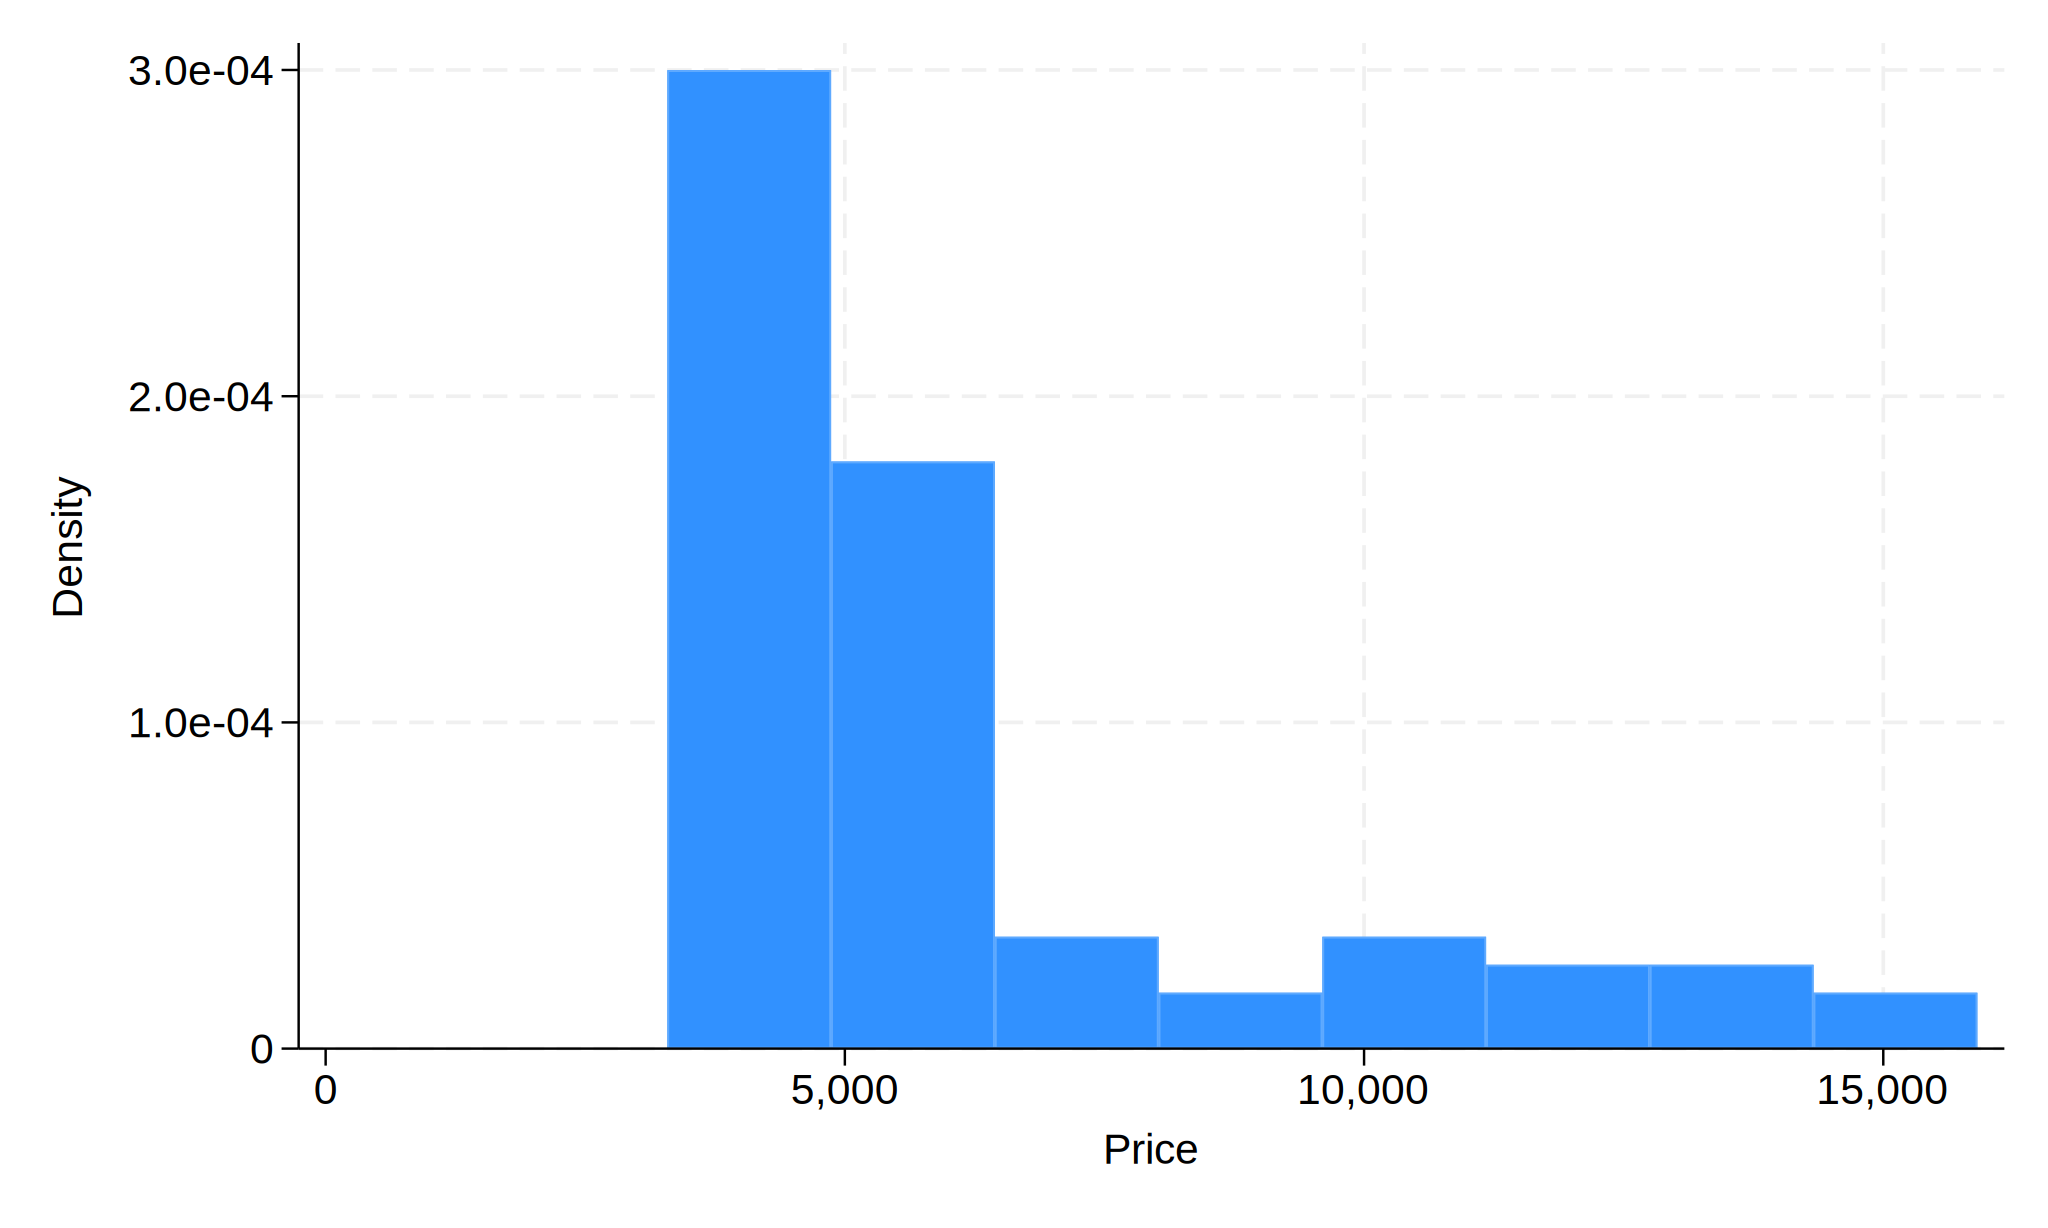

In [11]:
%%stata
hist price

(bin=8, start=3291, width=1576.875)


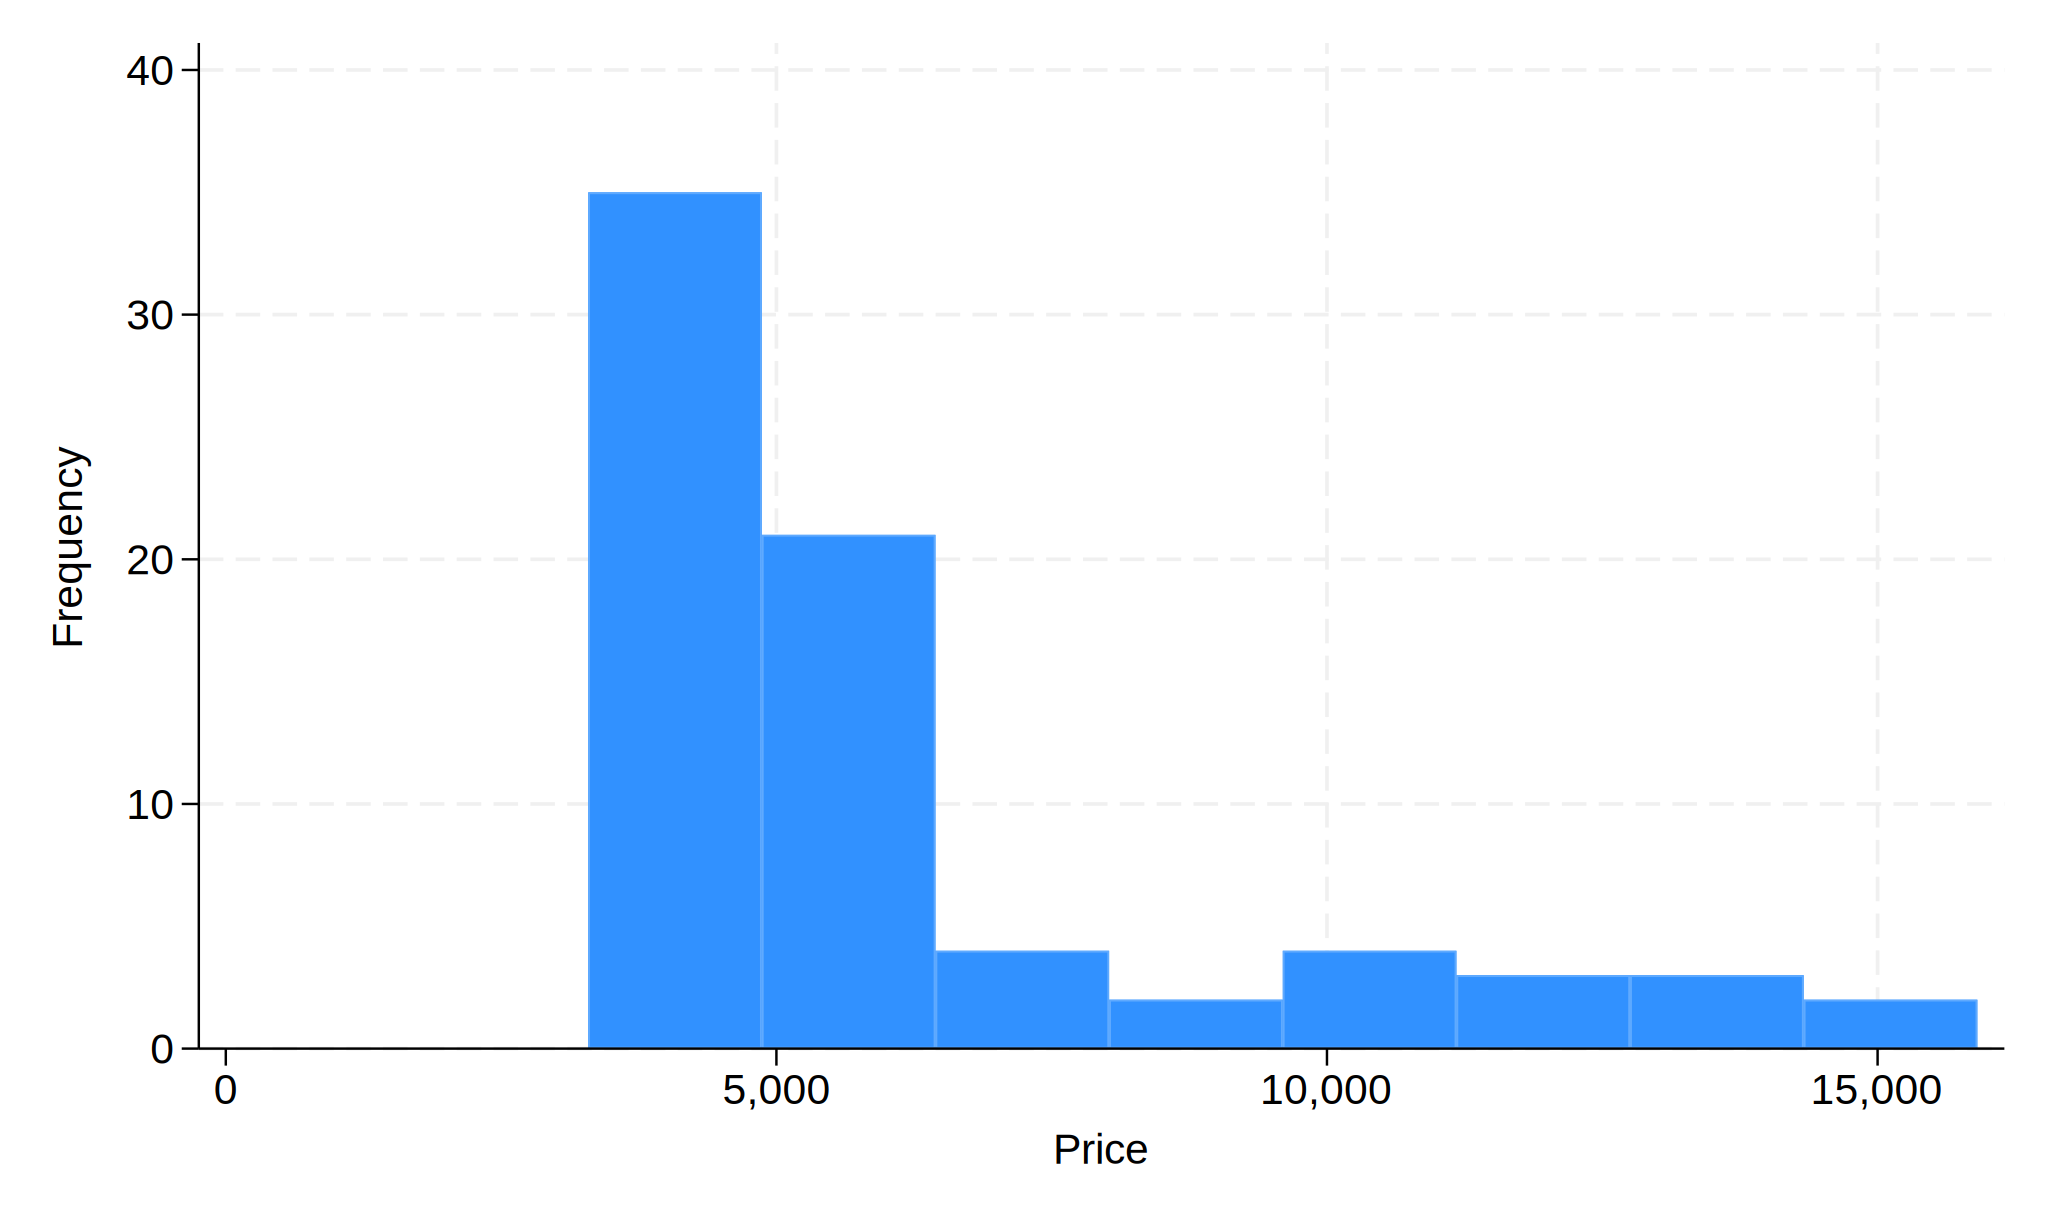

In [12]:
%%stata
hist price, freq

(bin=8, start=3291, width=1576.875)


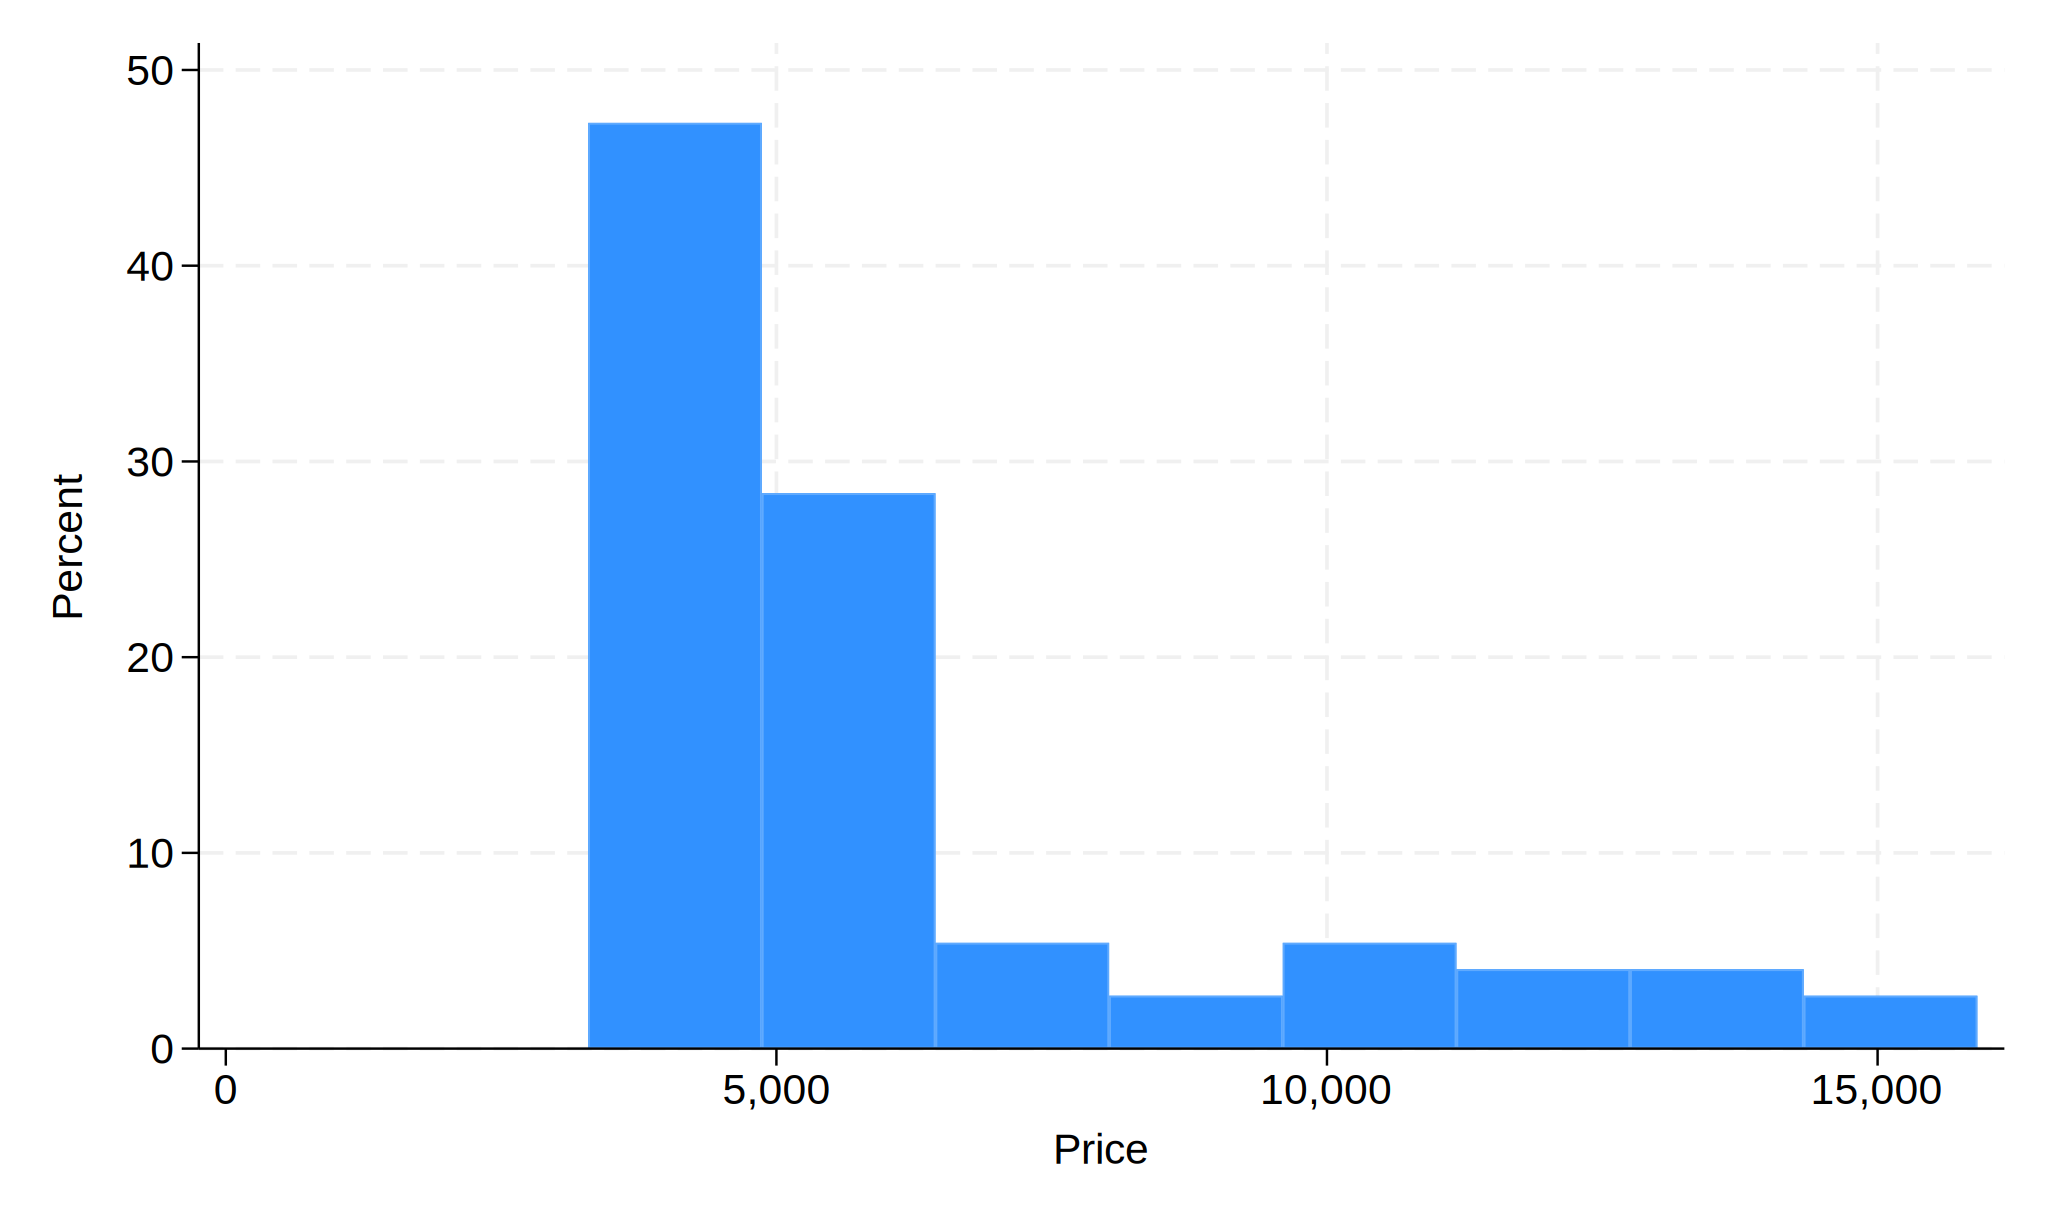

In [13]:
%%stata
hist price, percent

(bin=8, start=3291, width=1576.875)


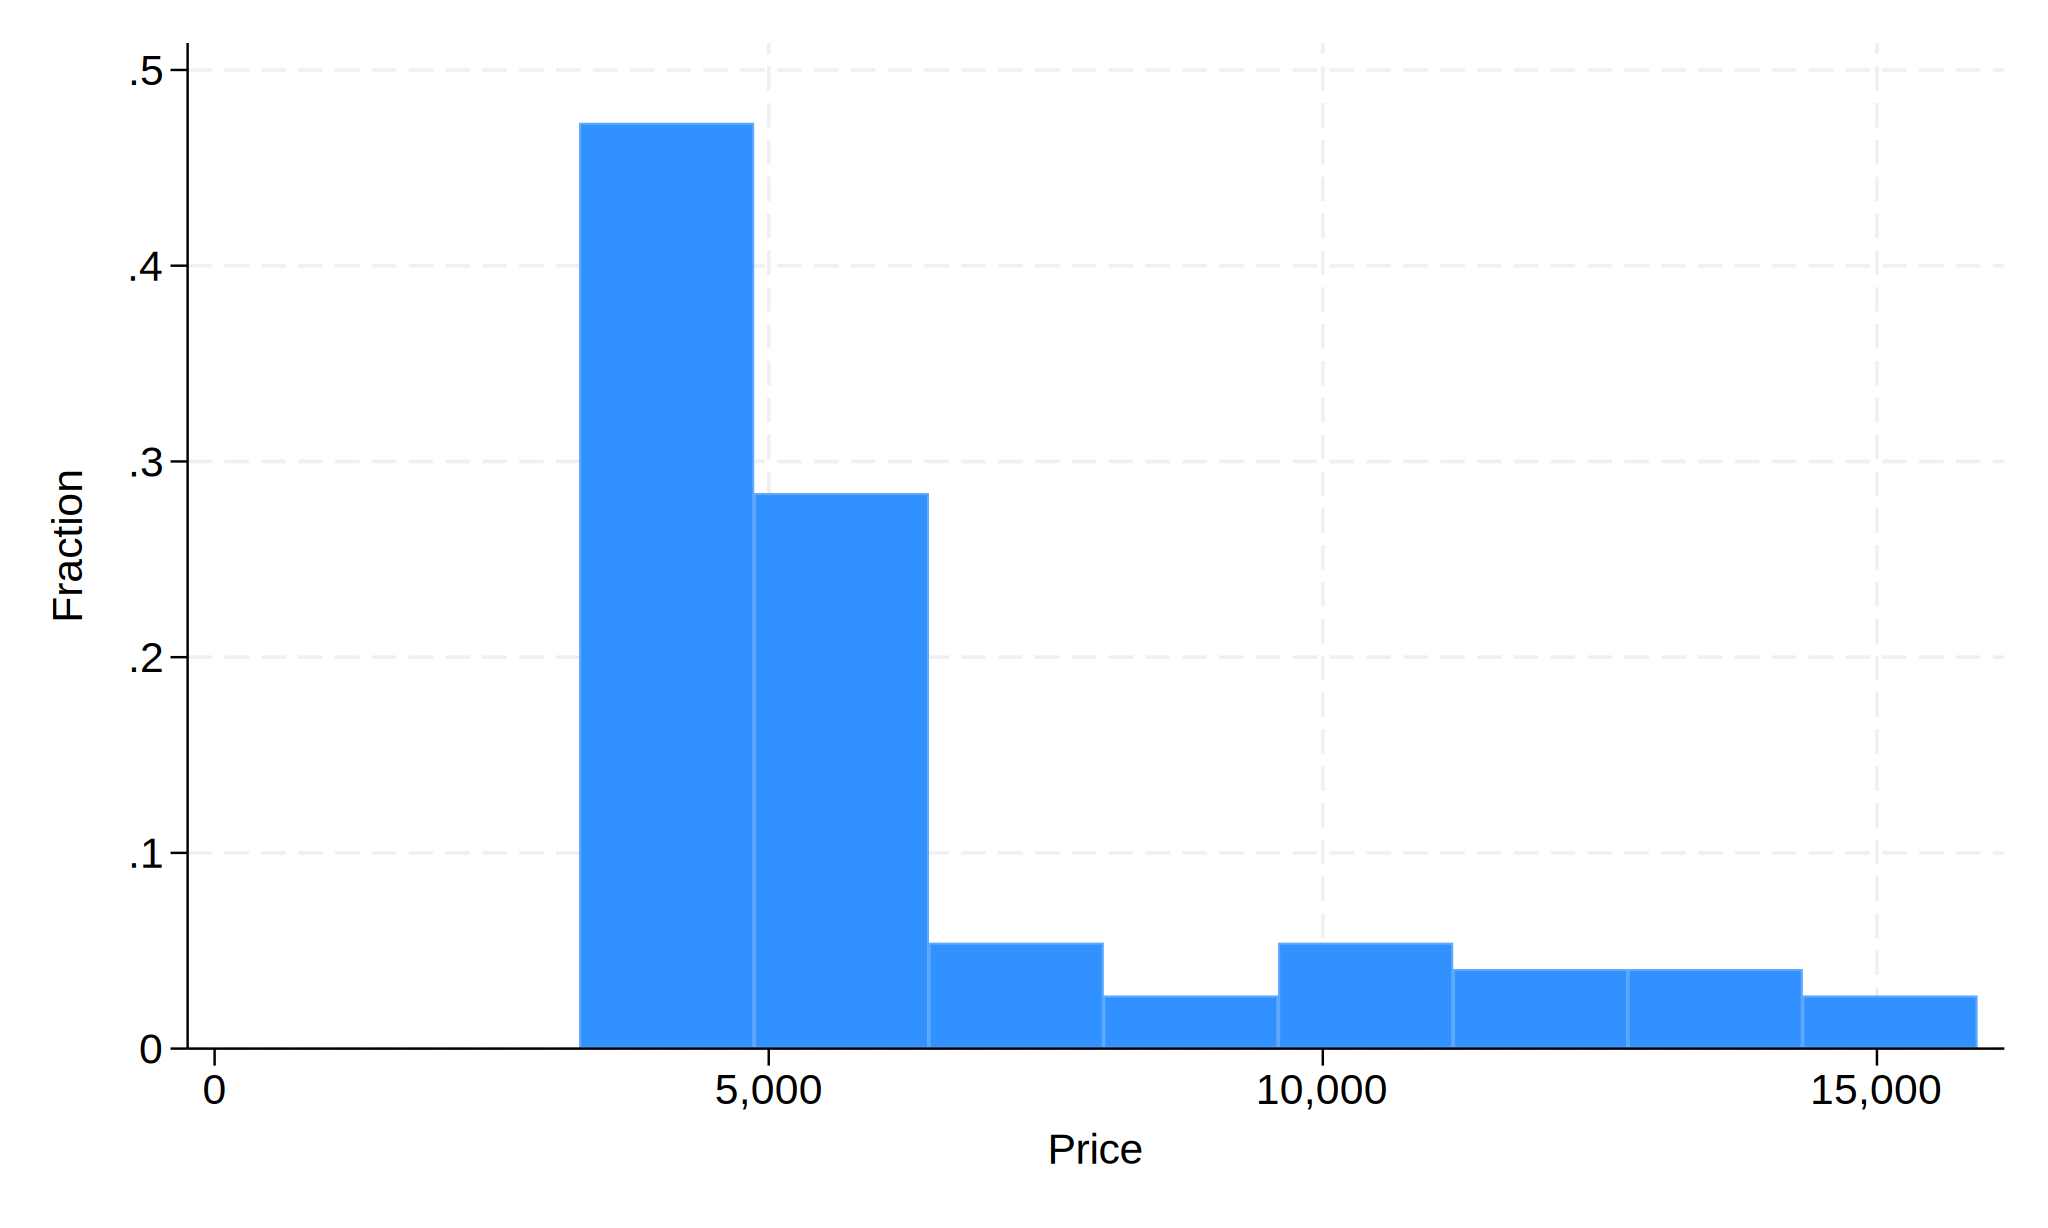

In [14]:
%%stata
hist price, frac

(bin=5, start=3291, width=2523)


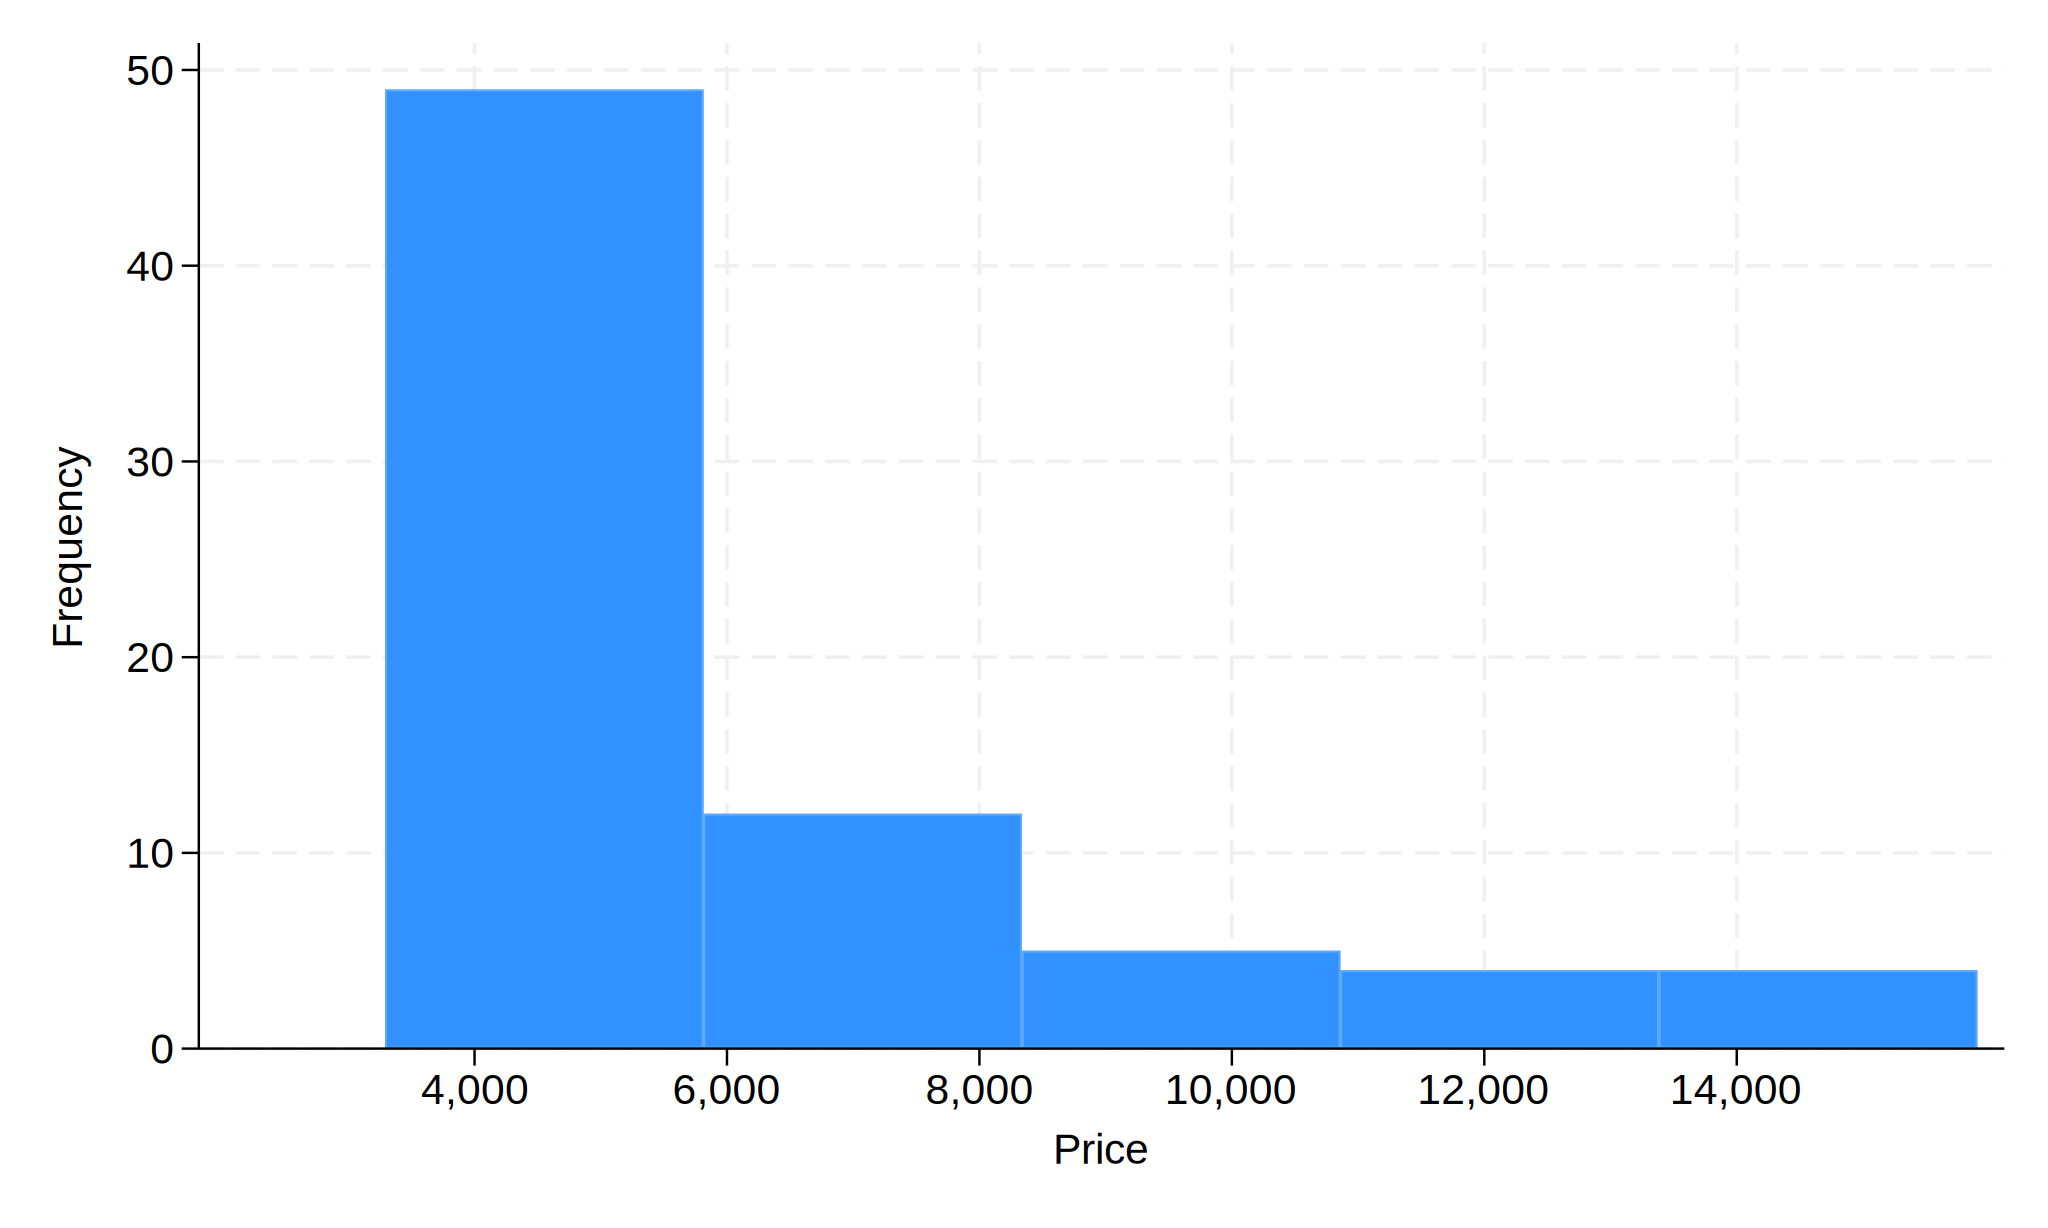

In [15]:
%%stata
hist price, freq bin(5)

### 添加密度曲线

- `normal` 选项可以用来绘制正态分布曲线，可以用来查看数据是否服从正态分布。
- `normopts(line_options`) 选项可以用来指定正态分布曲线的线条属性，比如 `normopts(lcolor(red))` 表示正态分布曲线的颜色为红色。
- `kdensity` 选项可以用来绘制核密度曲线，可以用来查看数据的密度分布情况。
- `kdenopts(line_options)` 选项可以用来指定核密度曲线的线条属性，比如 `kdenopts(lcolor(blue))` 表示核密度曲线的颜色为蓝色。

(bin=5, start=3291, width=2523)


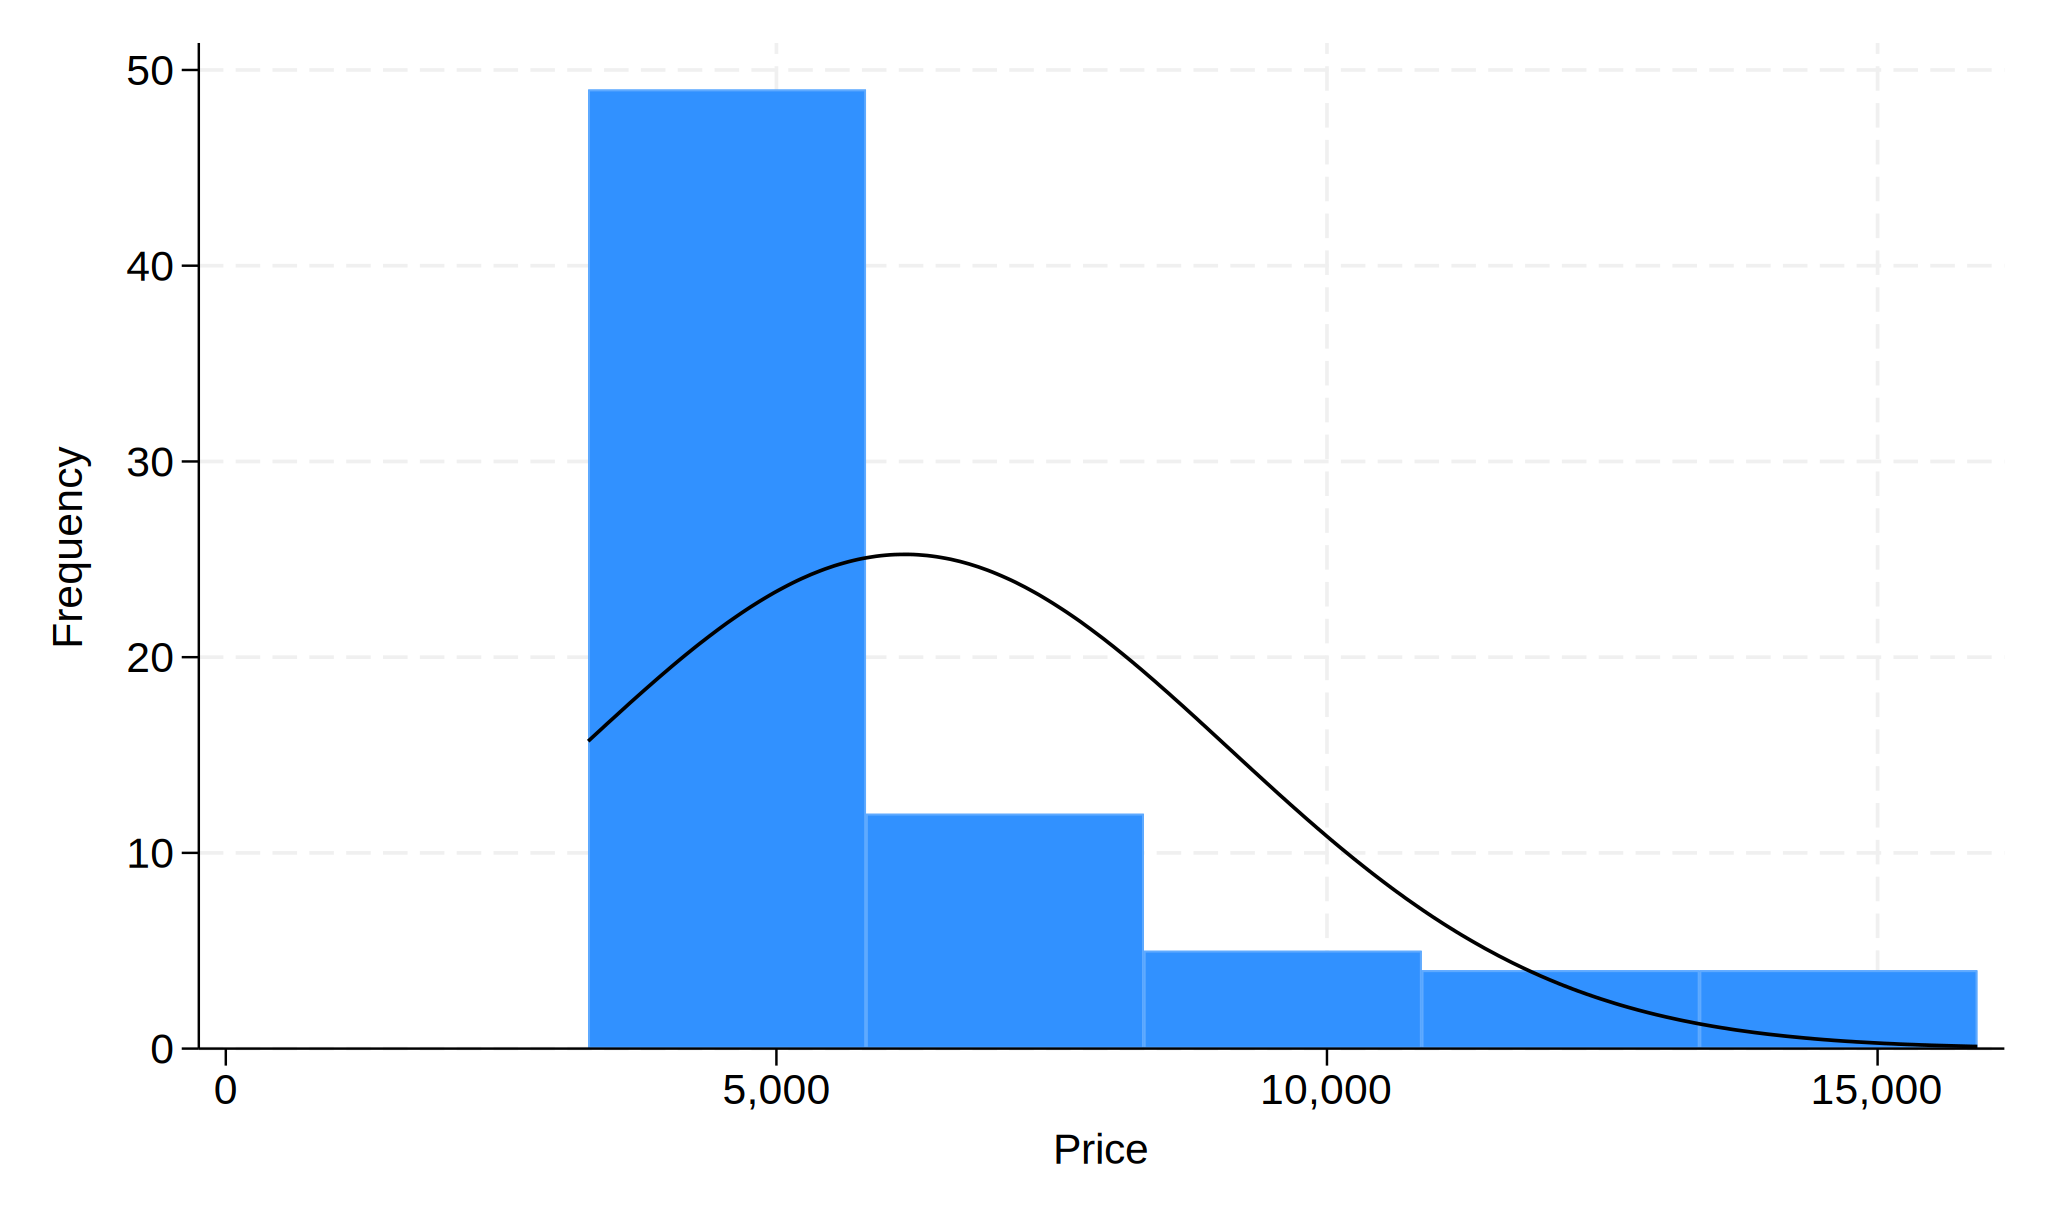

In [17]:
%%stata
hist price, freq bin(5) normal

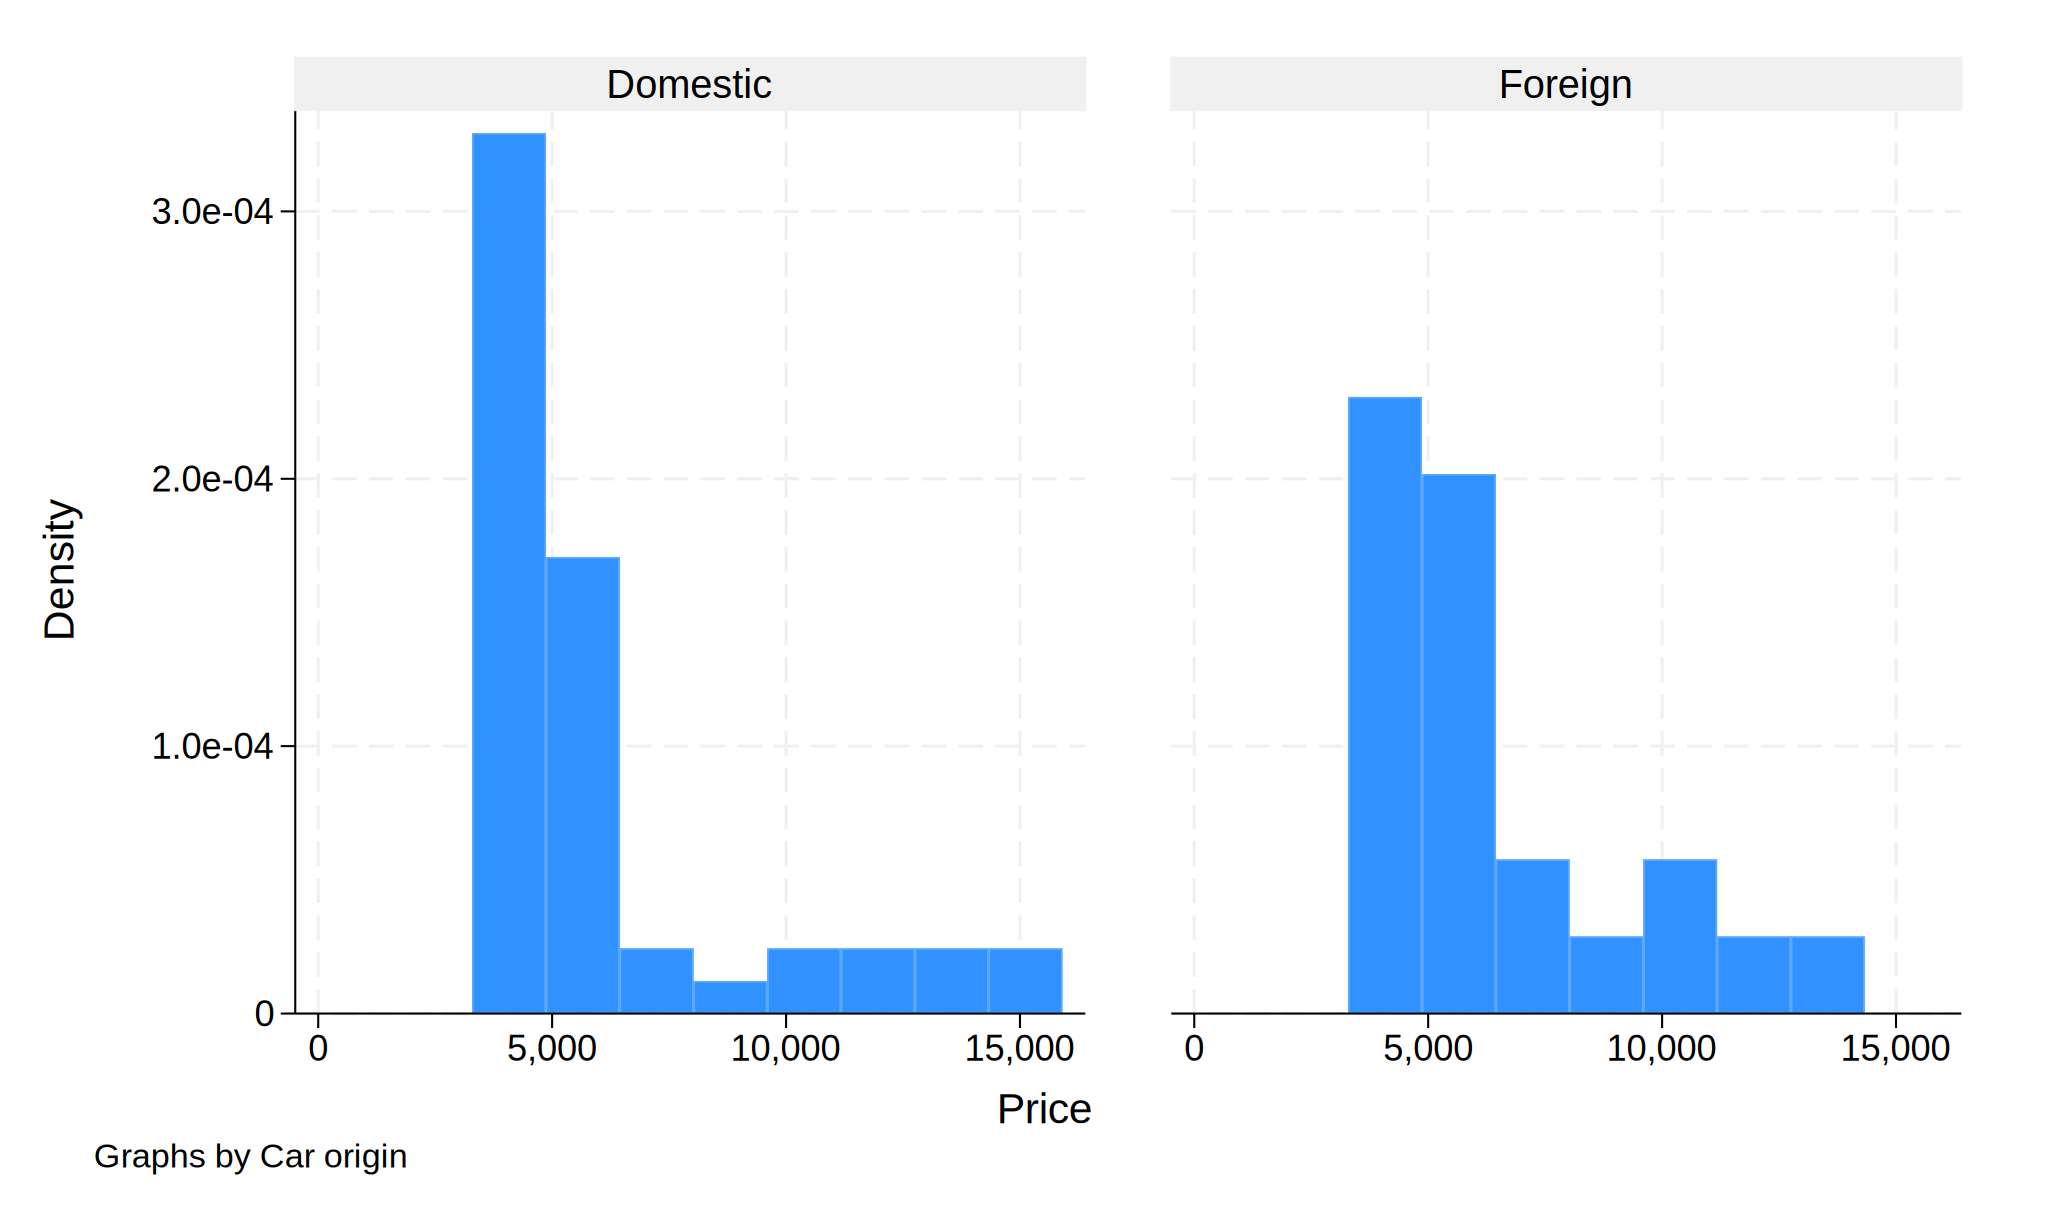

In [18]:
%%stata
hist price, by(foreign)

## graph box
绘制箱线图，可以用来查看数据的分布情况和异常值。

箱线图的中位数、四分位数、最大值、最小值、异常值等信息。

箱线图的中位数是箱子的中间线，四分位数是箱子的上下边界，最大值和最小值是箱子的上下须，异常值是箱子外的点。

箱线图的优点是可以清晰地显示数据的分布情况和异常值，缺点是不能显示数据的具体数值。

语法： `graph box yvars [if] [in] [weight] [, options]`

`graph hbox yvars [if] [in] [weight] [, options]`

他们的区别在于 `graph box` 是绘制垂直箱线图，`graph hbox` 是绘制水平箱线图。

- `[]` 表示可选项，不是必须的。
- `varlist` 表示变量列表，可以指定一个或多个变量。
- `if` 和 `in` 是条件语句，可以用来筛选数据。
- `options` 是可选项，可以用来指定其他参数，一些可以自定义的选项。

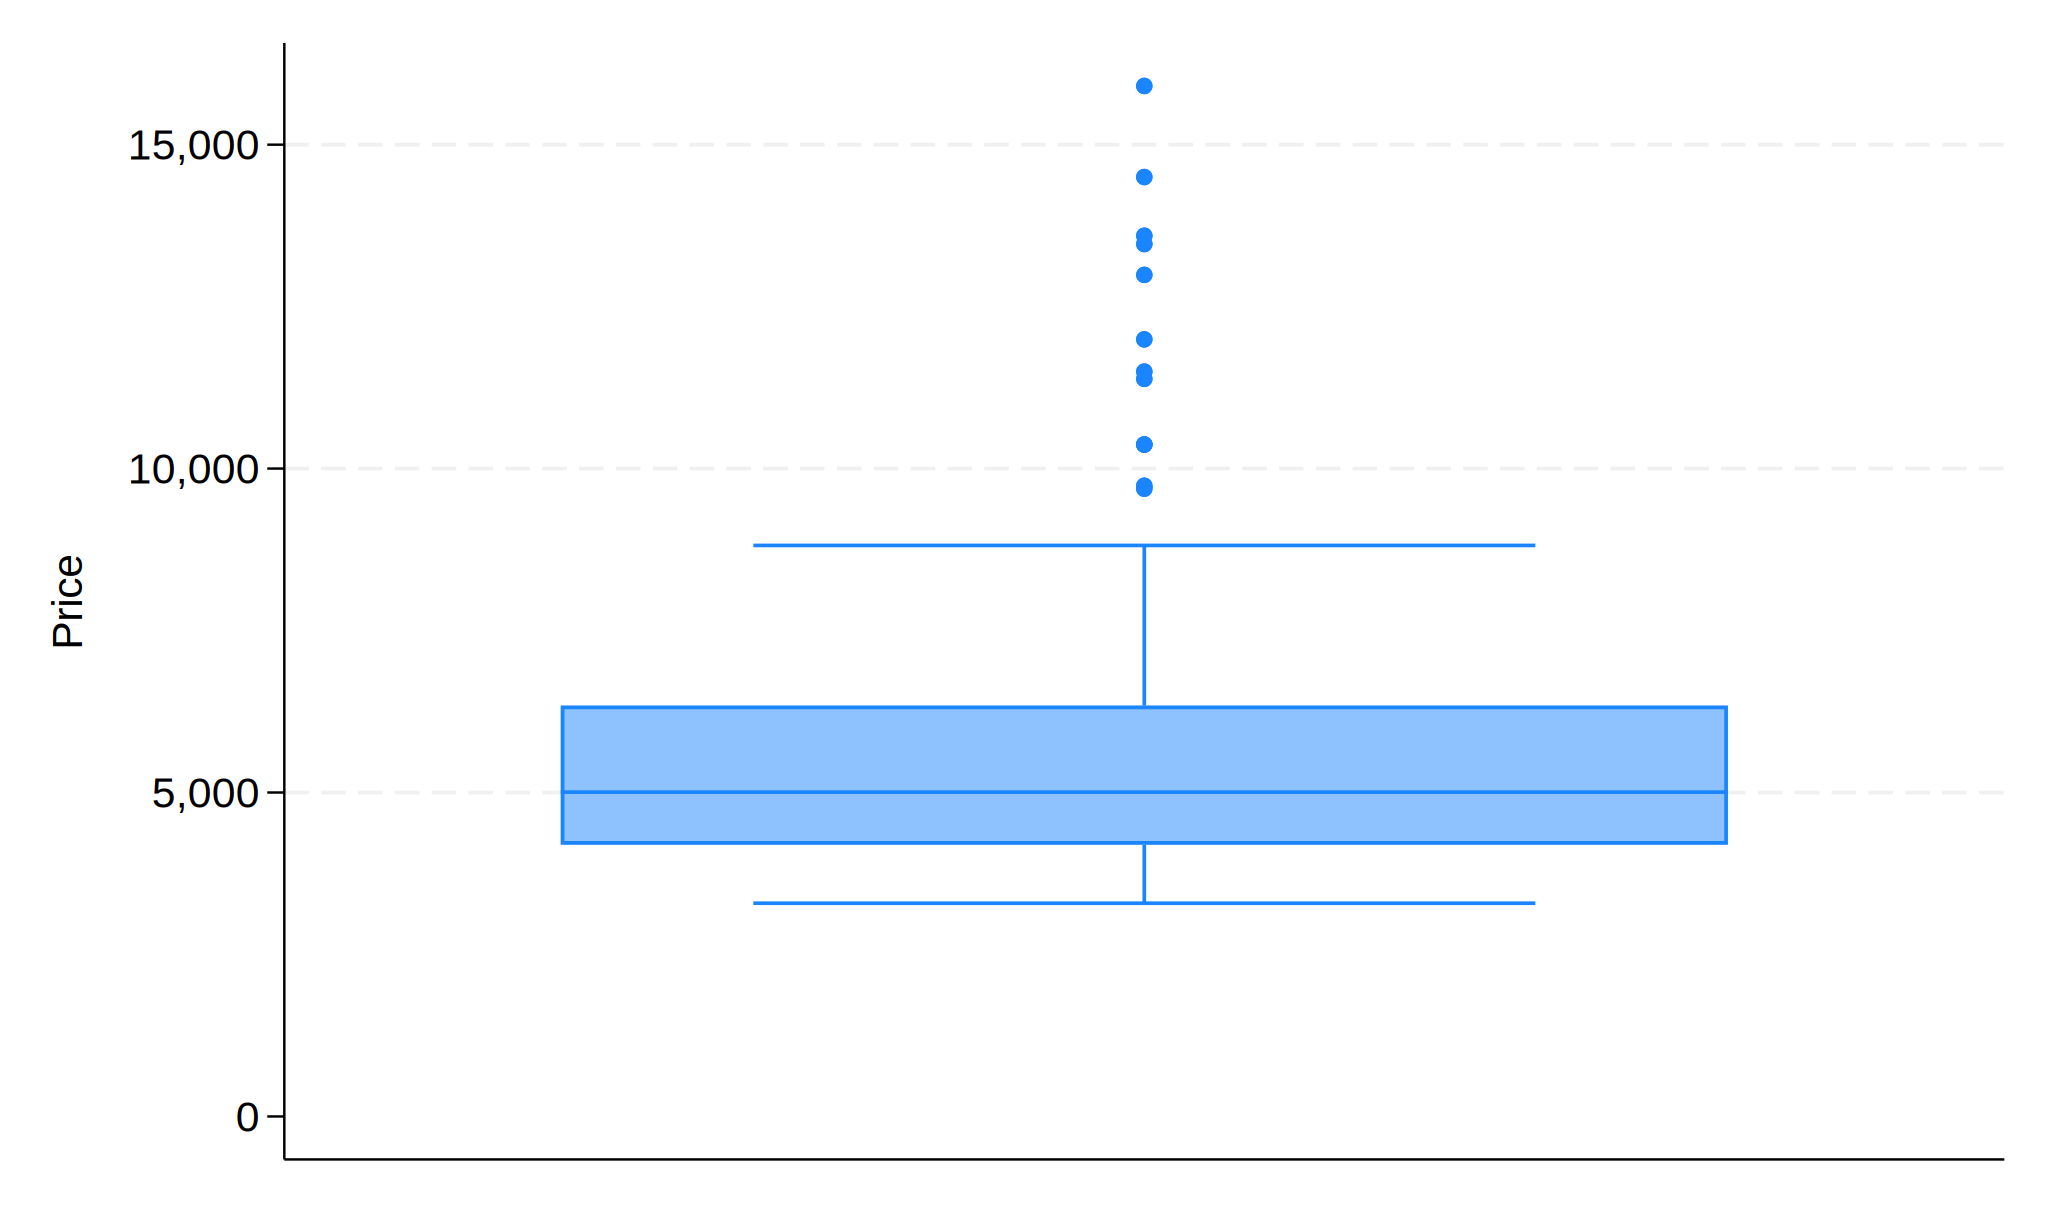

In [19]:
%%stata
graph box price

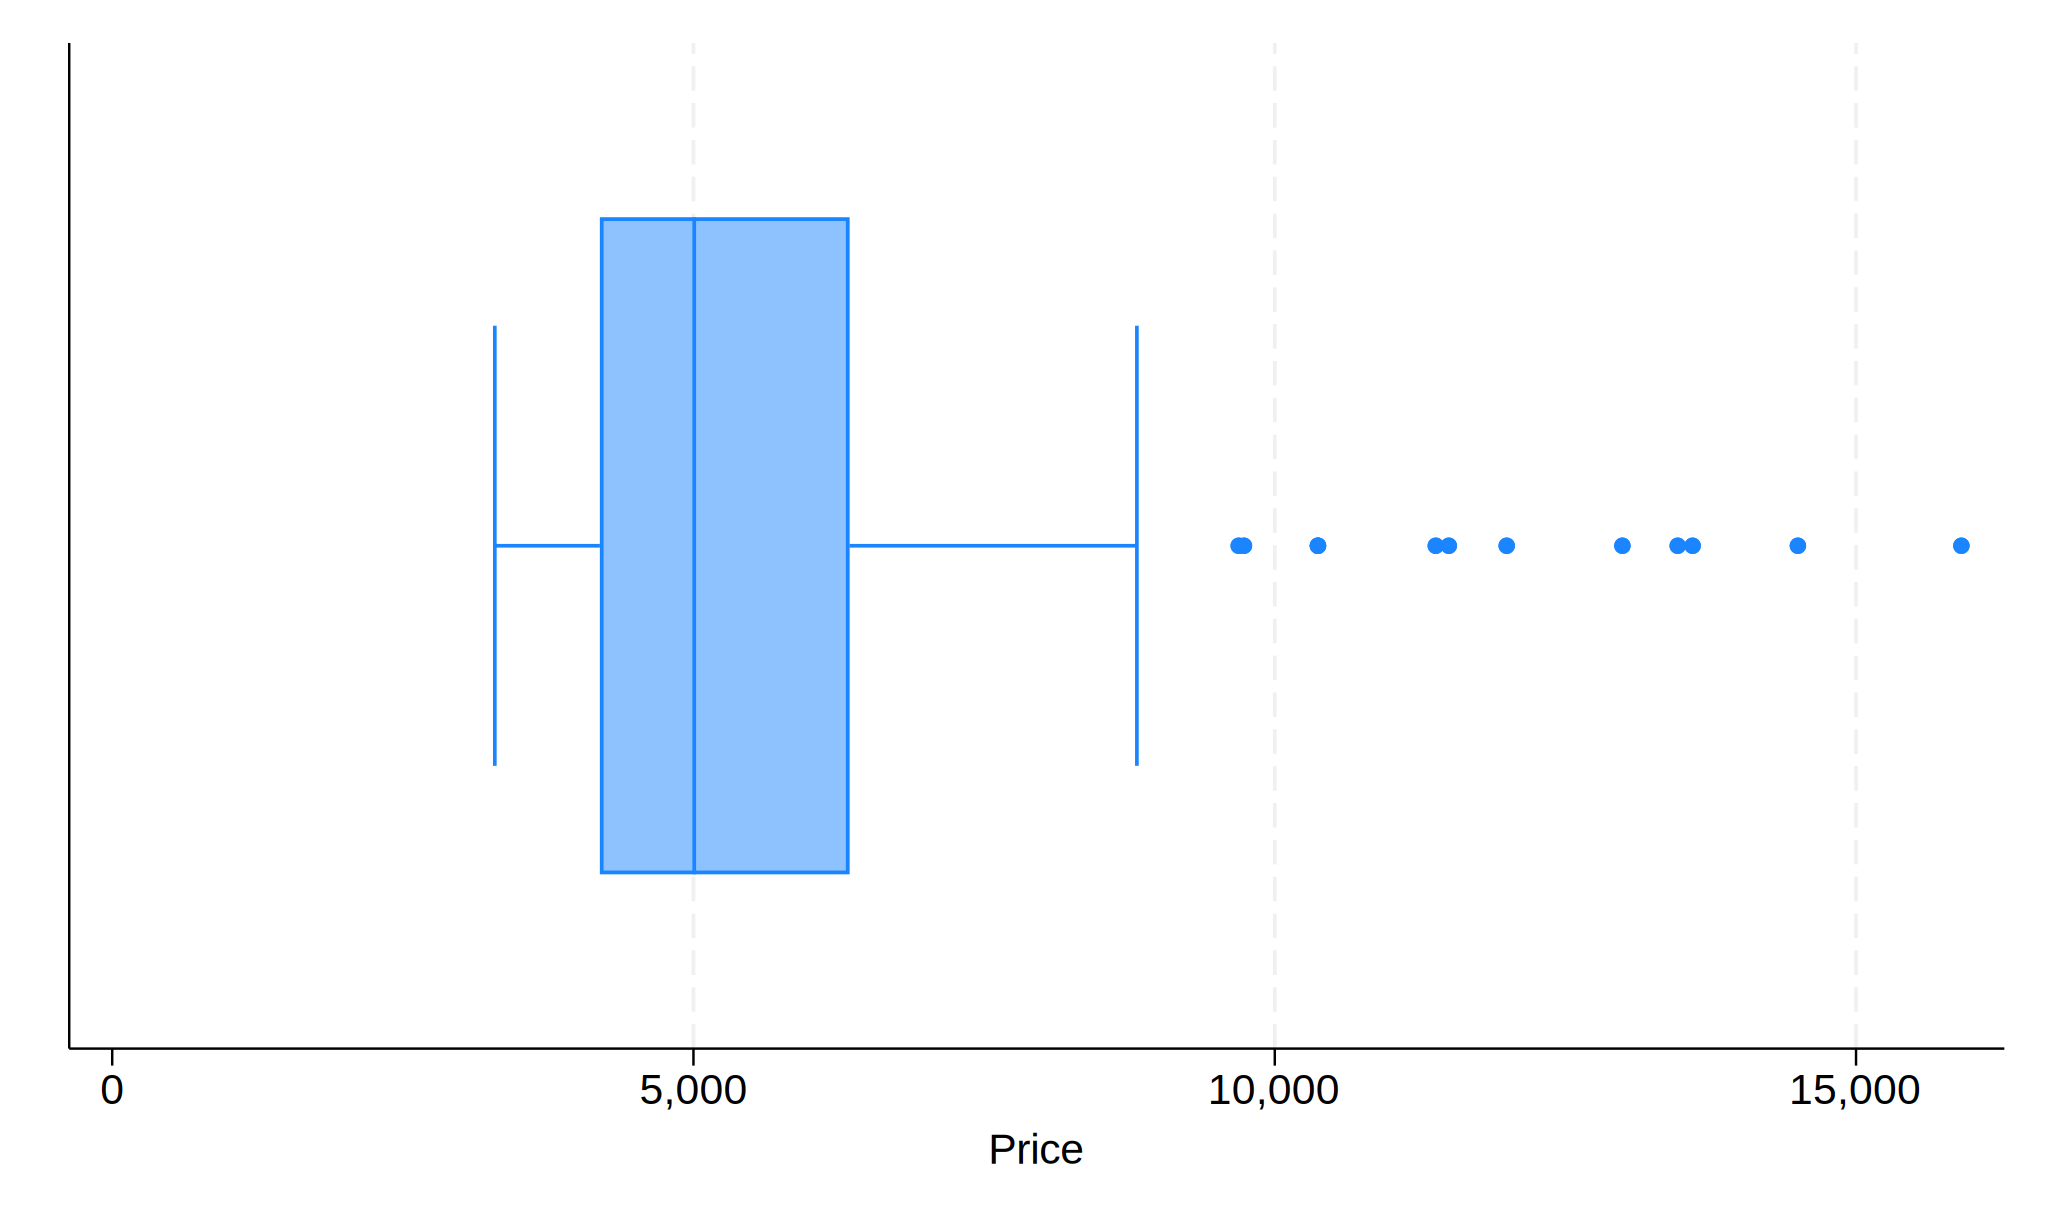

In [20]:
%%stata
graph hbox price

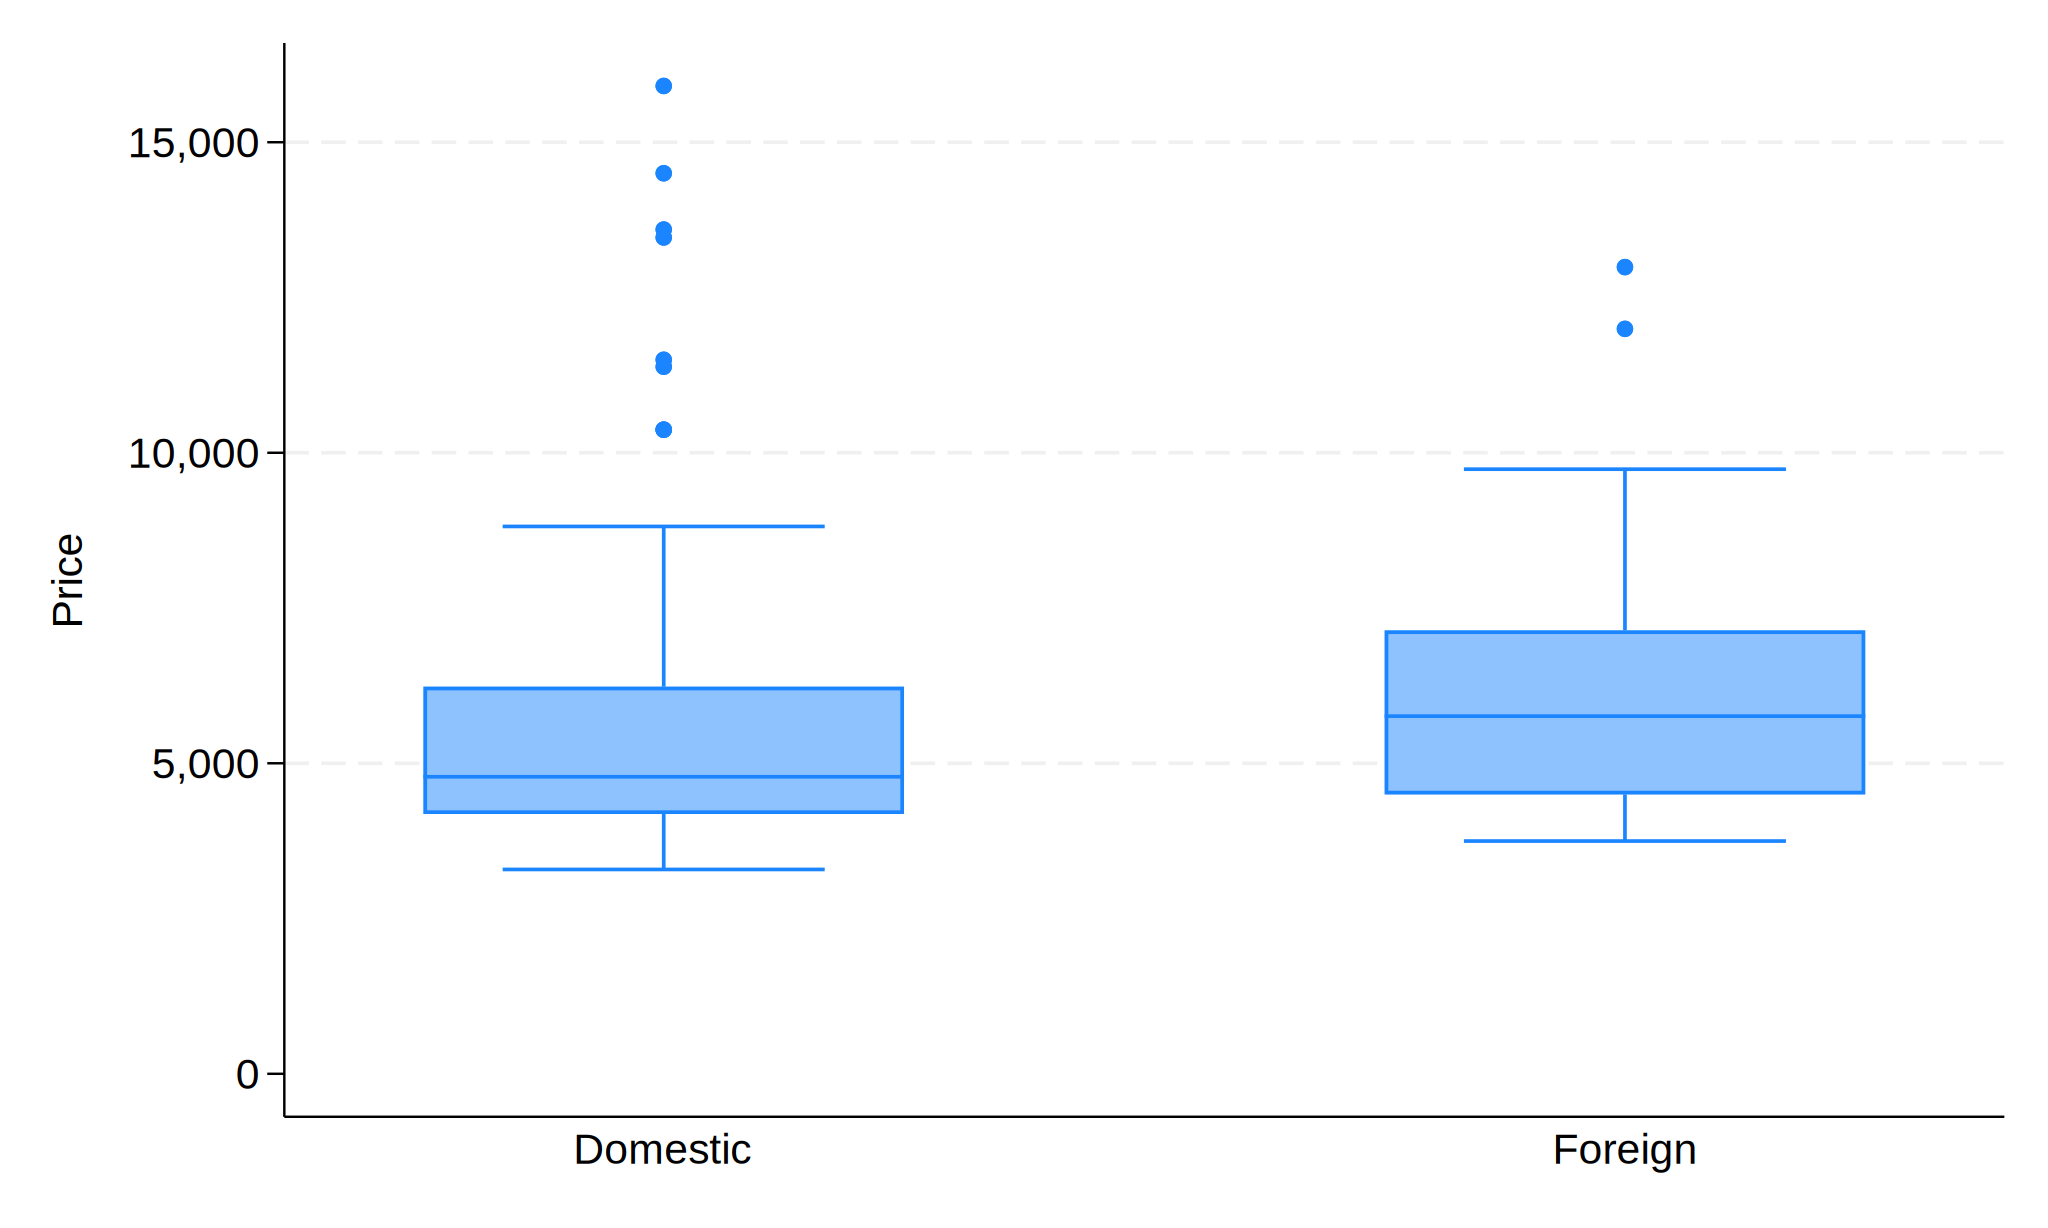

In [21]:
%%stata
graph box price, over(foreign)

## biolin plot
小提琴图，类似于箱线图，可以用来查看数据的分布情况和异常值。

语法： `biolin [varlist] [if] [in] [, options]`
- `[]` 表示可选项，不是必须的。
- `varlist` 表示变量列表，可以指定一个或多个变量。
- `if` 和 `in` 是条件语句，可以用来筛选数据。
- `options` 是可选项，可以用来指定其他参数，一些可以自定义的选项。

In [22]:
%%stata
// 不是自带的命令，需要下载安装
ssc install vioplot


. // 不是自带的命令，需要下载安装
. ssc install vioplot
checking vioplot consistency and verifying not already installed...
installing into C:\Users\asus\ado\plus\...
installation complete.

. 


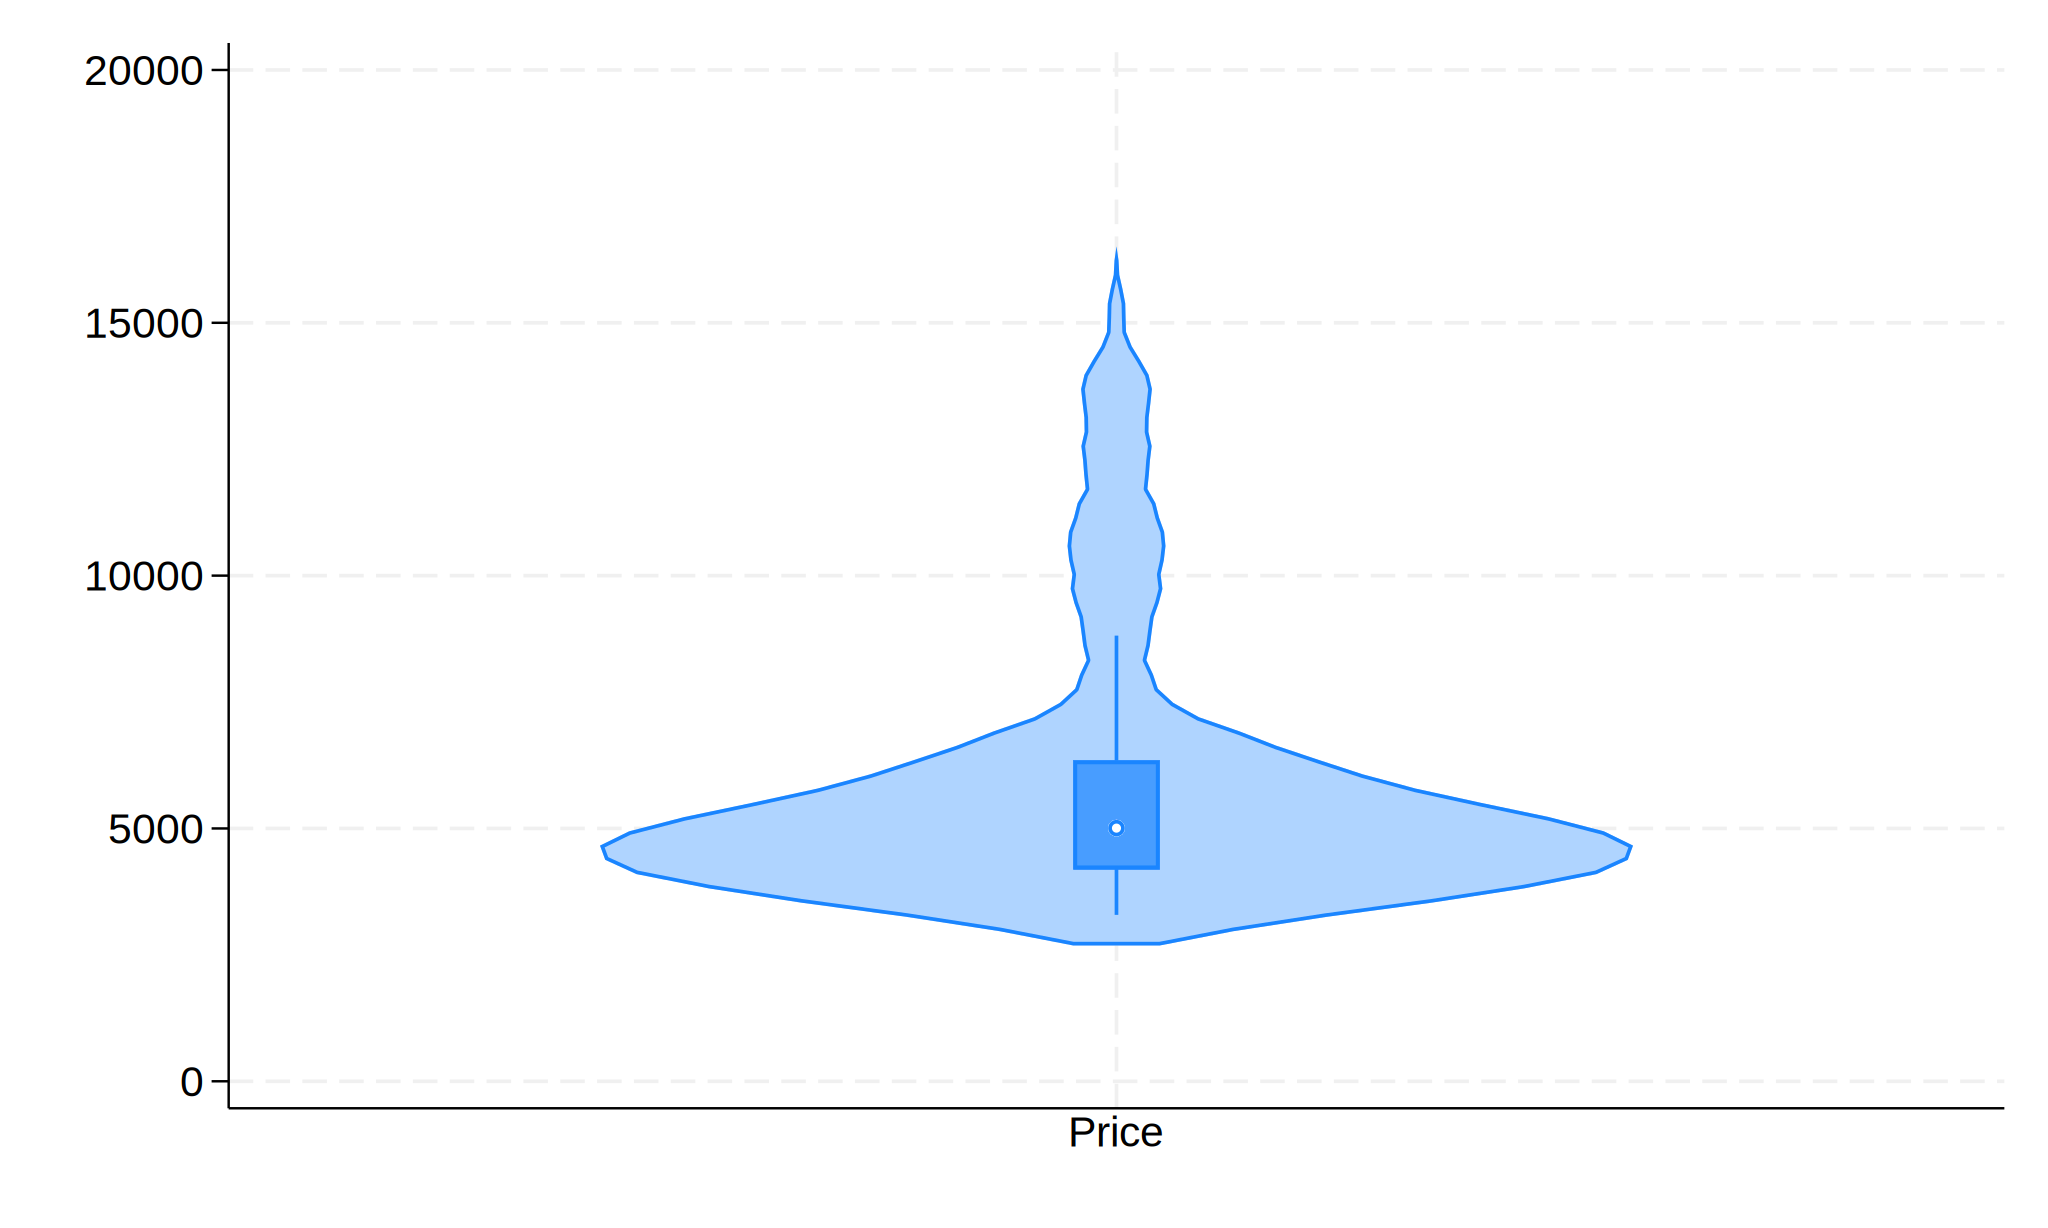

In [23]:
%%stata
vioplot price

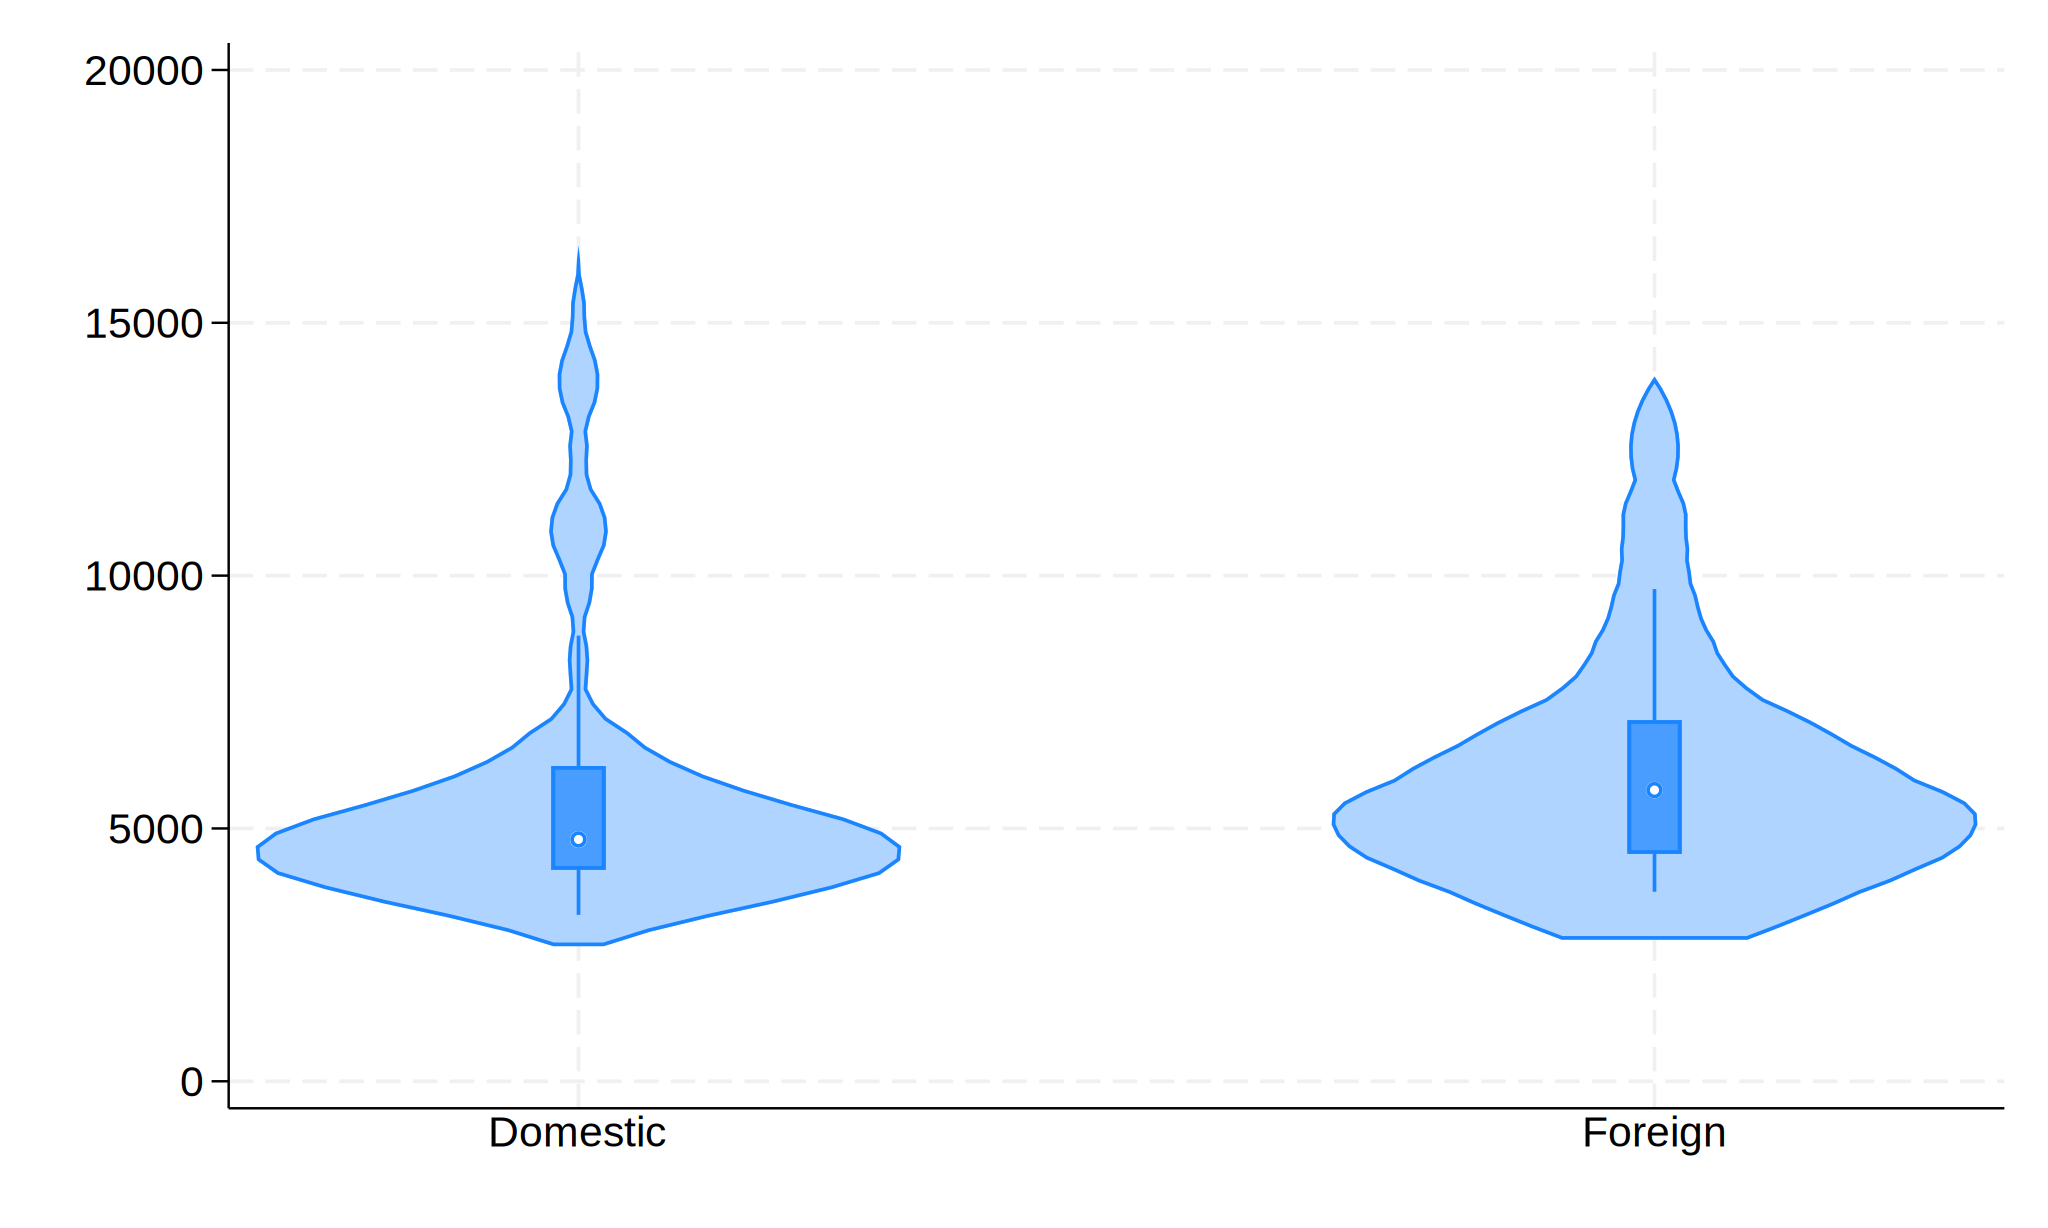

In [25]:
%%stata
vioplot price, over(foreign)